<a href="https://colab.research.google.com/github/wsamuelw/google-cloud-vision/blob/master/google_cloud_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install the package
!pip install google-cloud-vision

In [0]:
# load the package
from google.cloud import vision

In [0]:
# you will need to go to https://console.cloud.google.com/apis/credentials/serviceaccountkey to get a json file
# then, upload the json file here (look for the folder icon on the left hand side to upload file)

# define the dir. for the json 
# rename whatever you named the json file e.g. mine = google vision key
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="google vision key.json"

In [0]:
# create a client
# you will need to check the step above if you see an error 
client = vision.ImageAnnotatorClient()

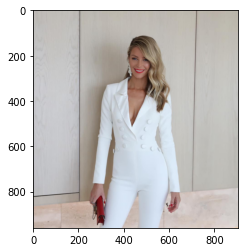

In [5]:
# load package to display image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

input_image = mpimg.imread('jennifer hawkins.jpg')
imgplot = plt.imshow(input_image)

In [0]:
image_to_open = 'jennifer hawkins.jpg'

with open(image_to_open, 'rb') as image_file:
    input_content = image_file.read()

In [0]:
# create a Vision object which will allow you to send a request to proceed with text recognition
input_image = vision.types.Image(content = input_content)

# text_response = client.text_detection(image=image)

In [12]:
# show the best label
web_response = client.web_detection(image = input_image)
web_content = web_response.web_detection

print(web_content.best_guess_labels)

[label: "blazer"
]


In [13]:
# this shows more possibilities of the content of the image
predictions = [
(entity.description, '{:.2%}'.format(entity.score)) for entity in web_content.web_entities
]

print(predictions)

[('Miss Universe 2004', '164.31%'), ('Beauty Pageant', '41.74%'), ('', '26.34%'), ('Blazer', '24.97%'), ('Model', '23.80%'), ('Vệt Thoi Gian', '23.29%'), ('Photo shoot', '22.98%'), ('Beauty', '20.43%'), ('Tuxedo M.', '18.64%'), ('Supermodel', '18.29%')]


In [14]:
# now, try get google to find other images similar to this
# this is super cool if you like fashion or online shopping e.g. find a blazer 
web_content.visually_similar_images[:5]

[url: "https://fashionreportdaily.files.wordpress.com/2015/12/cara-delevingne-tuxedo.jpg?w=470",
 url: "https://www.bcbg.com/dw/image/v2/AAXX_PRD/on/demandware.static/-/Sites-bcbg-site-catalog/default/dwb3272e17/images/large/FSP4270717_690.jpg?sw=500&sh=791&sm=fit",
 url: "https://www.whistles.com/dw/image/v2/BDCH_PRD/on/demandware.static/-/Sites-whistles-master-catalog/default/dwfe56a151/images/00402955624/whistles-annie-wedding-blazer-ivory-multi-01.jpg?sw=571&sh=800&strip=false",
 url: "https://qph.fs.quoracdn.net/main-qimg-4b258837d965208edb3099bfc25f6f6a",
 url: "https://cache.net-a-porter.com/images/products/1213335/1213335_ou_920_q80.jpg"]

In [15]:
# Let’s have a look at what the Vision API can tell you about this photo

image_to_open = 'jennifer hawkins.jpg'

with open(image_to_open, 'rb') as image_file:
    content = image_file.read()
image = vision.types.Image(content=content)

face_response = client.face_detection(image=image)
face_content = face_response.face_annotations

face_content[0].detection_confidence

0.9772665500640869

In [16]:
# show the emotion state PLUS other attributes as well
for face in face_response.face_annotations:
    joy_likelihood = vision.enums.Likelihood(face.joy_likelihood)
    sorrow_likelihood = vision.enums.Likelihood(face.sorrow_likelihood)
    anger_likelihood = vision.enums.Likelihood(face.anger_likelihood)
    surprise_likelihood = vision.enums.Likelihood(face.surprise_likelihood)
    under_exposed_likelihood = vision.enums.Likelihood(face.under_exposed_likelihood)
    blurred_likelihood = vision.enums.Likelihood(face.blurred_likelihood)
    headwear_likelihood = vision.enums.Likelihood(face.headwear_likelihood)

    print(f'Joy Likelihood: {joy_likelihood.name.title()}')
    print(f'Sorrow Likelihood: {sorrow_likelihood.name.title()}')
    print(f'Anger Likelihood: {anger_likelihood.name.title()}')
    print(f'Surprise Likelihood: {surprise_likelihood.name.title()}')
    print(f'Under Exposed Likelihood: {under_exposed_likelihood.name.title()}')
    print(f'Blurred Likelihood: {blurred_likelihood.name.title()}')
    print(f'Headwear Likelihood: {headwear_likelihood.name.title()}')


Joy Likelihood: Very_Likely
Sorrow Likelihood: Very_Unlikely
Anger Likelihood: Very_Unlikely
Surprise Likelihood: Very_Unlikely
Under Exposed Likelihood: Very_Unlikely
Blurred Likelihood: Very_Unlikely
Headwear Likelihood: Very_Unlikely


In [0]:
# show you the details extracted from the image
face_content[0]

bounding_poly {
  vertices {
    x: 398
    y: 130
  }
  vertices {
    x: 548
    y: 130
  }
  vertices {
    x: 548
    y: 304
  }
  vertices {
    x: 398
    y: 304
  }
}
fd_bounding_poly {
  vertices {
    x: 405
    y: 162
  }
  vertices {
    x: 538
    y: 162
  }
  vertices {
    x: 538
    y: 295
  }
  vertices {
    x: 405
    y: 295
  }
}
landmarks {
  type: LEFT_EYE
  position {
    x: 449.4569396972656
    y: 215.26197814941406
    z: 8.106231689453125e-06
  }
}
landmarks {
  type: RIGHT_EYE
  position {
    x: 496.4911804199219
    y: 220.11279296875
    z: -1.222222089767456
  }
}
landmarks {
  type: LEFT_OF_LEFT_EYEBROW
  position {
    x: 436.37261962890625
    y: 201.87356567382812
    z: 3.3172688484191895
  }
}
landmarks {
  type: RIGHT_OF_LEFT_EYEBROW
  position {
    x: 463.2535705566406
    y: 207.6814727783203
    z: -9.787520408630371
  }
}
landmarks {
  type: LEFT_OF_RIGHT_EYEBROW
  position {
    x: 484.2760009765625
    y: 208.3501739501953
    z: -10.4017305